In [ ]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Load article content

In [ ]:
with open('../data/article_content.pkl','rb') as f:
    article_content = pickle.load(f)

## Author Analysis

#### Number of articles per year

In [ ]:
apy = []

for year, articles in article_content.items():
    apy.append([year,len(articles)])

a = np.array(apy)
np.sum(a[:,1])

4974

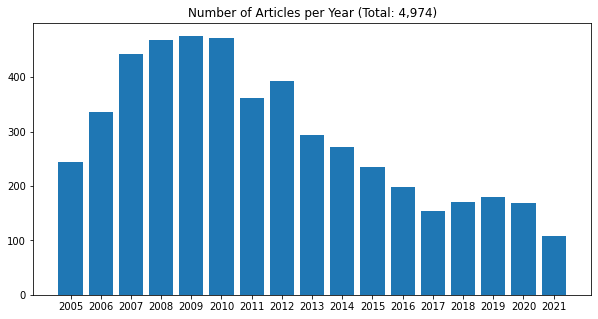

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x=a[:,0], height=a[:,1])
plt.title('Number of Articles per Year (Total: 4,974)')
plt.xticks(a[:,0], labels=a[:,0])
plt.show()

#### Number of words per article

In [ ]:
wcy = []

for year, articles in article_content.items():
    for article in articles:
        wcy.append([article['date'], article['word_count']])

In [ ]:
df = pd.DataFrame(data=wcy, columns=['date','word_count'])
df['datefmt'] = pd.to_datetime(df['date'], format="%m/%d/%Y")
word_count = df.groupby(by=['datefmt'], as_index=False).mean()
dma_7 = word_count.rolling(window=7, on='datefmt').mean()
dma_30 = word_count.rolling(window=30, on='datefmt').mean()

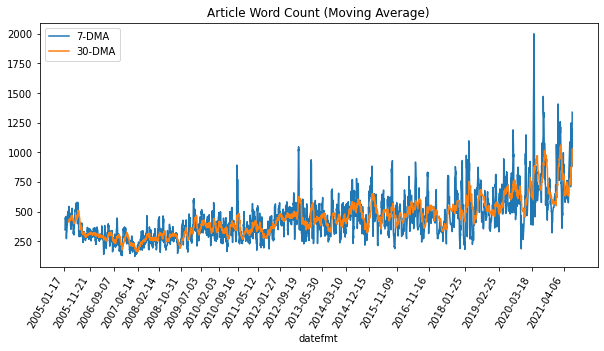

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

dma_7.plot(x='datefmt', y='word_count', kind='line', ax=ax)
dma_30.plot(x='datefmt', y='word_count', kind='line', ax=ax)

plt.title('Article Word Count (Moving Average)')
plt.legend(['7-DMA','30-DMA'])
plt.xticks(dma_7['datefmt'][::180], rotation=60)
plt.show()

## Article Network Analysis
* I need to figure out how to show direction. The current graph suggests that article are two-way, but they are not.  

* I would like to plot the graph, however defined, with color coding the topic. This could potentially show clusters.  
* There are other options for doing analysis based on topic, such as topic modeling. Use case? None.


### Create Article Network

* Load article content.
* Create article network. The network is made up of edges, where the nodes are Source Article = requested URL and Target Article = embedded URL. The design of the data streucture (node-pairs): [['Source Article','Target Article'],...]

In [ ]:
article_network = []

for year, articles in article_content.items():
    for index, article in enumerate(articles):
        for url in article['embedded_urls']:
            article_network.append([article['title'], article['url'], url])

for index, article in enumerate(article_network):
    if article[2] == None:
        article_network.remove(article_network[index])

df = pd.DataFrame(data=article_network, columns=['Title','Source','Target']).to_csv('../data/article_network.csv', index=False)

### Network Analysis

* What kind of graph should I be constructing? Links really only go one way, from article to linked articles to further linked articles. You cannot open a linked article and get back to the article that links to that article

In [ ]:
g = nx.Graph()

for index, node in enumerate(article_network):
    g.add_edge(node[1], node[2])

#### Most Linked-to Article

In [ ]:
len(article_network)

18291

In [ ]:
# The highest link is 63, but there are 18,291 edges, so not a very connected network.
dg = sorted(g.degree, key=lambda x: x[1], reverse=True)

In [ ]:
dg[:10]

[('http://www.econlib.org/archives/2010/04/the_common-sens.html', 63),
 ('http://www.econlib.org/archives/2011/11/the_magic_of_ed.html', 50),
 ('http://www.amazon.com/Myth-Rational-Voter-Democracies-Policies/dp/0691129428',
  44),
 ('https://www.econlib.org/reflections-from-spain/', 41),
 ('http://www.amazon.com/gp/product/046501867X?ie=UTF8&tag=bryacaplwebp-20&linkCode=as2&camp=1789&creative=9325&creativeASIN=046501867X',
  40),
 ('http://www.econlib.org/archives/2011/01/the_stranger.html', 40),
 ('https://www.amazon.com/Case-against-Education-System-Waste/dp/0691174652/ref=as_sl_pc_qf_sp_asin_til?tag=bryacaplwebp-20&linkCode=w00&linkId=2a0c58e873ed68d8abd86c1449dd0968&creativeASIN=0691174652',
  38),
 ('https://www.econlib.org/archives/2014/05/demagoguery_exp.html', 37),
 ('http://www.amazon.com/dp/0691129428?tag=bryacaplwebp-20&camp=0&creative=0&linkCode=as1&creativeASIN=0691129428&adid=15GADVSDGSTT9WGRE8F5&',
  37),
 ('https://www.econlib.org/archives/2013/01/making_you_smar.html',

In [ ]:
# Not a very dense network.
nx.density(g)

0.00013793206941728698

#### Draw Network

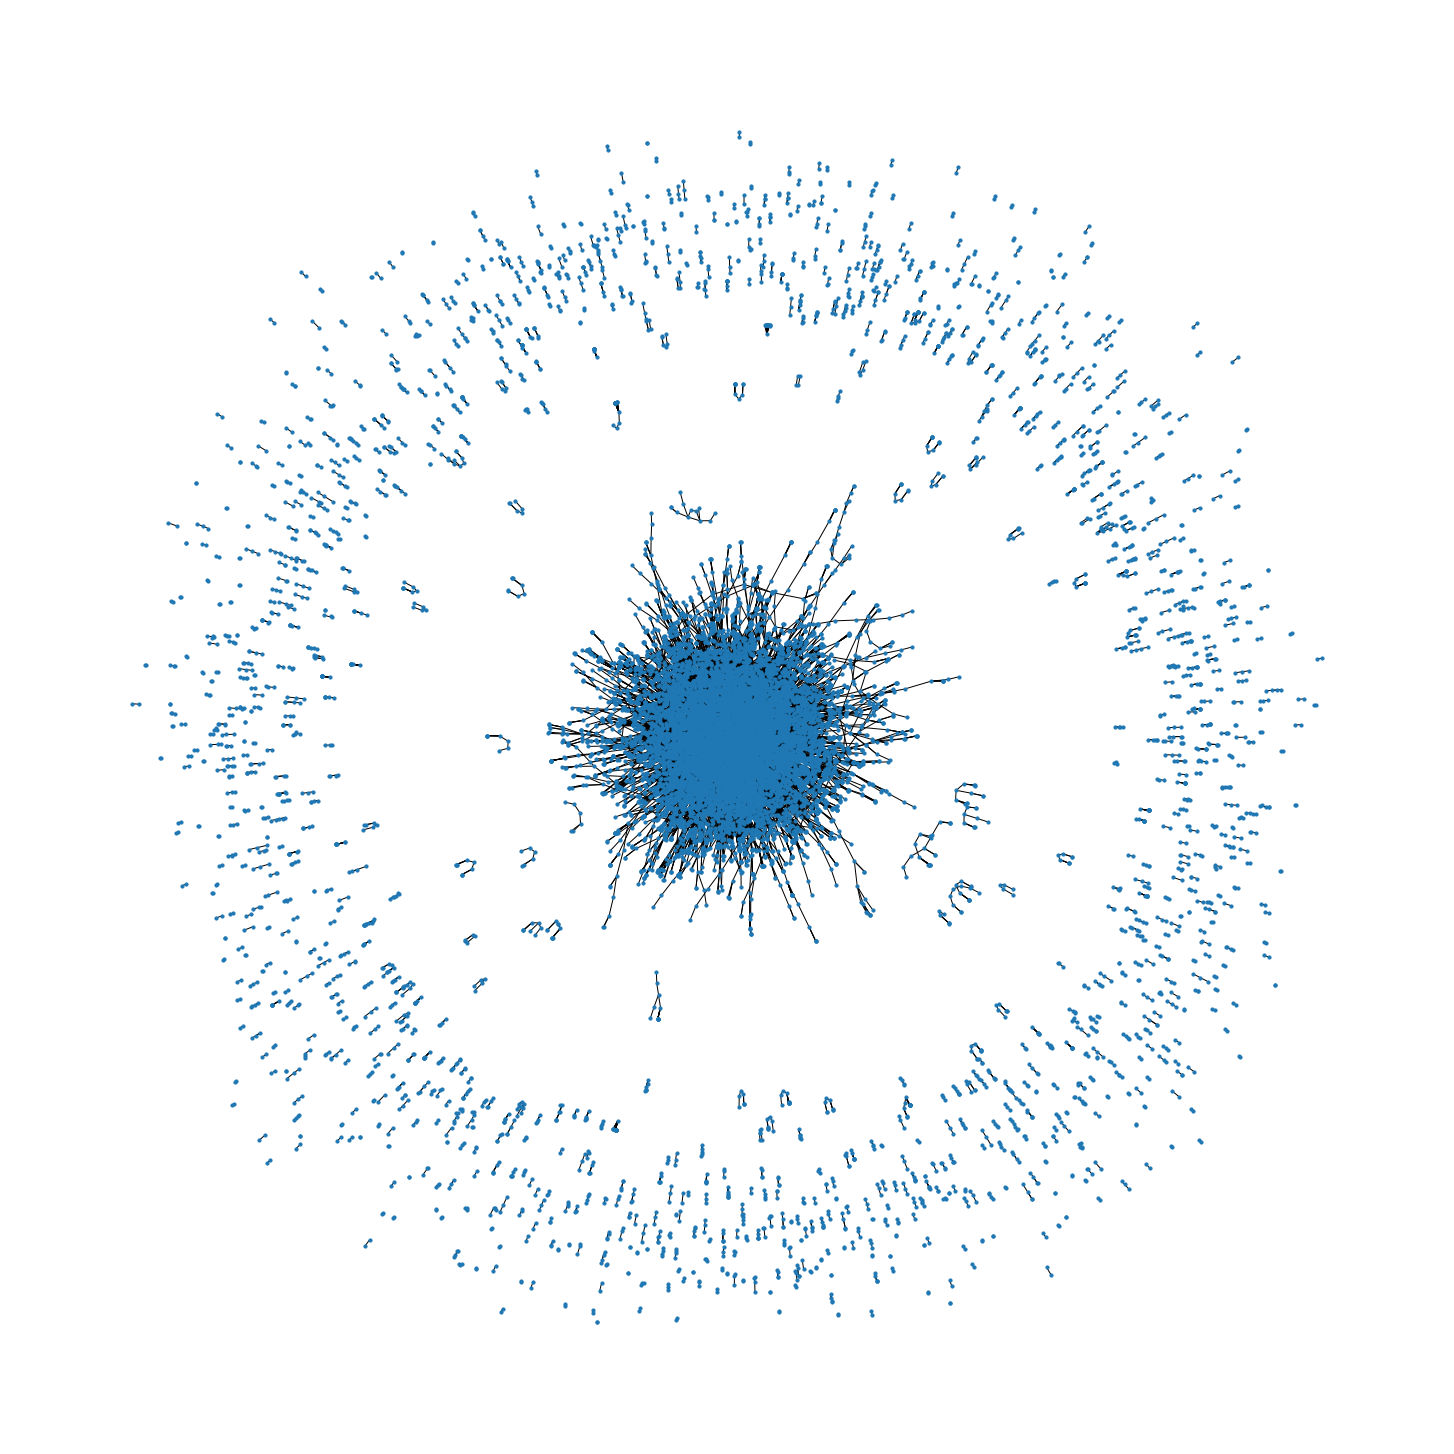

In [ ]:
plt.figure(figsize=(20,20))
nx.draw(g, node_size=10)#, with_labels=True)
plt.savefig('../figs/article_network.png')